<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/Week5_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [23]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [24]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [25]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [26]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [27]:
df_select = df[['case_status', 'class_of_admission', 'country_of_citizenship', 'ri_layoff_in_past_six_months', 'us_economic_sector']]
df_select

,case_status,class_of_admission,country_of_citizenship,ri_layoff_in_past_six_months,us_economic_sector
0,Certified,J-1,NaN,NaN,IT
1,Denied,B-2,NaN,NaN,Other Economic Sector
2,Certified,H-1B,NaN,NaN,Aerospace
3,Certified,B-2,NaN,NaN,Other Economic Sector
4,Certified,L-1,NaN,NaN,Advanced Mfg
...,...,...,...,...,...
374357,Withdrawn,NaN,SOUTH KOREA,N,NaN
374358,Withdrawn,L-1,VIETNAM,Y,NaN
374359,Withdrawn,H-1B,INDIA,N,NaN
374360,Withdrawn,B-2,SOUTH KOREA,N,NaN


# 3.) Clean your data for a decision tree


In [28]:
# All X variables have to be turned to numeric
X = pd.get_dummies(df_select, 
                   columns = ['class_of_admission', 'country_of_citizenship', 'ri_layoff_in_past_six_months', 'us_economic_sector']
                   ).drop(['case_status'], axis = 1)
y = df['case_status']

In [29]:
X

,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,...,us_economic_sector_Energy,us_economic_sector_Finance,us_economic_sector_Geospatial,us_economic_sector_Health Care,us_economic_sector_Homeland Security,us_economic_sector_Hospitality,us_economic_sector_IT,us_economic_sector_Other Economic Sector,us_economic_sector_Retail,us_economic_sector_Transportation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374360,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Check for any null values
np.any(np.isnan(X))

False

# 4.) Fit and plot a decision tree of depth 3


In [31]:
from sklearn import tree

In [32]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'class_of_admission_H-1B <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]\nclass = Certified'),
 Text(0.25, 0.625, 'class_of_admission_L-1 <= 0.5\ngini = 0.642\nsamples = 91344\nvalue = [42621, 31744, 11336, 5643]\nclass = Certified'),
 Text(0.125, 0.375, 'ri_layoff_in_past_six_months_N <= 0.5\ngini = 0.66\nsamples = 71406\nvalue = [32675, 22948, 10777, 5006]\nclass = Certified'),
 Text(0.0625, 0.125, 'gini = 0.696\nsamples = 22266\nvalue = [8586, 7234, 4657, 1789]\nclass = Certified'),
 Text(0.1875, 0.125, 'gini = 0.638\nsamples = 49140\nvalue = [24089, 15714, 6120, 3217]\nclass = Certified'),
 Text(0.375, 0.375, 'country_of_citizenship_INDIA <= 0.5\ngini = 0.555\nsamples = 19938\nvalue = [9946, 8796, 559, 637]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.551\nsamples = 11163\nvalue = [6030, 4393, 347, 393]\nclass = Certified'),
 Text(0.4375, 0.125, 'gini = 0.548\nsamples = 8775\nvalue = [3916, 4403, 212, 244]\nclass = Denied'),


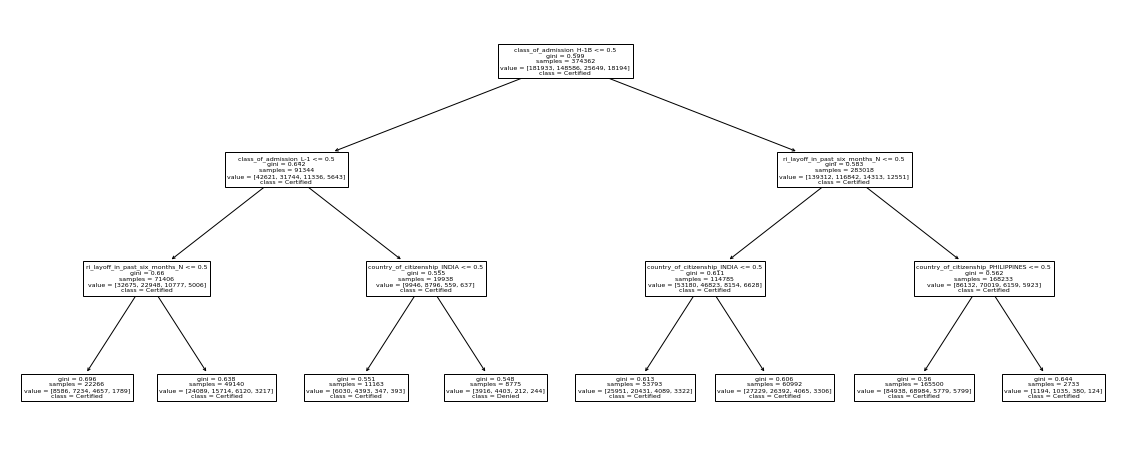

In [33]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, 
               feature_names = X.columns,
               class_names = y)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is comprised of certified individuals holding an H-1B class of admission (which refers to non-immigrant (temporary) workers in specialty occupations) who have been laid off in the past six months and whose country of citizenship is not the Philippines.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Inspect the distribution of the target variable 'caste_status' between classes
df.case_status.value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

In [36]:
from sklearn.metrics import roc_auc_score

outputs = []
max_depths = [1, 2, 3]

# Split the data (and stratify the train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state = 425,
                                                    stratify = df.case_status)

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  dec_tree = clf.fit(X_train, y_train)

  # Use ROC AUC score to evaluate out-of-sample accuracy
  oos_accuracy = roc_auc_score(y_test, 
                dec_tree.predict_proba(X_test),
                multi_class = 'ovo')
  
  outputs.append(oos_accuracy)

In [37]:
# Compare the out-of-sample accuracy for each max depth
results = pd.DataFrame({
    "max_depth": max_depths,
    "ROC AUC score": outputs
})

results

,max_depth,ROC AUC score
0,1,0.550534
1,2,0.590332
2,3,0.589966


A max depth of 2 produces the best out-of-sample accuracy amongst the three max depths tested.